# Scraping data from ESRI Map Servers
In the last notebook, we looked at the `Export Map` operation supported by many ESRI Map Services. Here we look at the `Query` operation which enables us to download specific features hosted in the layers included a map service. This can be a very useful means for collecting data from a wide variety of sources. 

We'll revisit the NCOneMap REST Endpoint ([link](https://services.nconemap.gov/secure/rest/services)) and download cenus 2010 tract data for NC.

## Exploring the map service in your browser.
It's always good to familiarize yourself with a service before invoking it. Here's a nice sequence to get you started.


* Open your browser to the metadata page for the [NC1Map_Census MapServer](https://services.nconemap.gov/secure/rest/services/NC1Map_Census/MapServer)


* First, it's useful to preview the layers and features served in the map service. To do this, click on the [**View In: `ArcGIS Online Map Viewer`**](http://www.arcgis.com/home/webmap/viewer.html?url=https%3A%2F%2Fservices.nconemap.gov%2Fsecure%2Frest%2Fservices%2FNC1Map_Census%2FMapServer&source=sd). This will open a new window where you can look at and interact with the layers served in the map service. 
 * Expand the layer in the contents to interact with specific layers.
 * Zoom to specific locations; note that some layers appear and disappear with the maps zoom level. 
 * Search for Durham and display only the "2010 Census - Block Group" layer. 
 * In the contents section, extend the details for this layer, then click the `Show Table` button beneath the layer's name. *This gives you an idea of how you can query records from this layer.*
 * Try filtering the records by clicking the `Filter` button (next to the `Show Table` button), and filter for `GEOID10 start with 37063` (that's the FIPS for Durham Co.)
 
 
* Go back to the map service metadata page, and take note of the **layers** included in this map service. These, of course, corresponde to the ones we viewed in the ArcGIS Online interface. We'll stick to interacting with the 2010 Census Block Group data


* Click on the link for the [2010 Census Block Group (8)](https://services.nconemap.gov/secure/rest/services/NC1Map_Census/MapServer/8) layer.
 * Examine the properties assocatied with this layer. In particular, look at:
  * The `MaxRecordCount` attribute. This defines how many features can be returned by a query at one time.
  * The `Fields` attribute, which lists the attribute fields included in this layer. 
  
  
* And finally, at the bottom of the page, examine the `Supported Operations`. We'll use the **Query** operation to query, and download, specific features.

## Quering features in the ArcGIS Rest Services
[Resource: https://developers.arcgis.com/rest/services-reference/query-map-service-layer-.htm ]

* Click on the [**Query**](https://services.nconemap.gov/secure/rest/services/NC1Map_Census/MapServer/8/query) opertaion for the layer. This brings up the interface to build the REST-based request to query data from the map service. 

We'll start slowly and then build up to a working query that does just what we want. First, we'll just fetch one record and examine the query results. 

* In the **Object IDs:** box, enter `1` to get the first record. Then execute the query by hitting Enter. 

You'll see the result at the bottom of the page.The full result, however, is cut off. We'll change the output from HTML to JSON to see the entire record. 

* In the **Format:** box, switch the value to `JSON` and run the query. 

This result is a raw JSON result, but we can browse it. Specifically, see how it returns, under the `features` section, an attribute of `GEOID10` with the 12-digit FIPS or "GeoID" code for the census block. We'll use that info to form a query. 

* Navigate your broswer back to the Query page. In the **Out Fields:** box, type a `*` to return **all** fields in our query. Run the query, keeping output in JSON format. Run the query.

Now you again see all the fields we can use to build our query. Next, we'll tweak the query to return all block groups falling in Durham county, that is all features with a GEOID10 starting with 37063.

* Go back to the query page again. 
 * Now in the **Where:** box, enter a string to return all records with a GEOID10 that begin with 37063: `GEOID10 = '370319703013'`. 
 * Also, clear out the `0` in the **Object IDs:** box. 
 * Run the query. You should again get one feature returned. 

Now to expand our query to return multiple records. This is a bit tricky as you need to know SQL commands, but they're just like the where clauses in ArcGIS Pro:

* Change the contents of the **Where:** box to `GEOID10 LIKE '37063%'`

The result is a looooong JSON object, but it contains all the information needed to build a feature class from these results. 

## Summary so far and what's next...
Ok, we have a feel for constructing and executing a query, but we have two more steps to accomplish. First, we need to run this query programmatically, from our coding environment. And second, we have to deal with getting the JSON back to a workable feature class.

### Running queries from Python
As seen in earlier examples, we can use the `requests` package to send REST based queries and handle the response. This case is just the same: we just need to manage the request URL that we created above. The URL for the Query request is copied and pasted below:

```html
https://services.nconemap.gov/secure/rest/services/NC1Map_Census/MapServer/8/query?where=GEOID10+LIKE+%2737063%25%27&text=&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&relationParam=&outFields=&returnGeometry=true&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&returnDistinctValues=false&resultOffset=&resultRecordCount=&queryByDistance=&returnExtentsOnly=false&datumTransformation=&parameterValues=&rangeValues=&f=pjson
```

Dissected into components, we have the code block below:

In [2]:
#Construct the request elements
theURL = 'https://services.nconemap.gov/secure/rest/services/NC1Map_Census/MapServer/8/query'
params = {'where':"GEOID10 LIKE '37063%'",
          'text':'','objectIds':'',
          'time':'',
          'geometry':'',
          'geometryType':'esriGeometryEnvelope',
          'inSR':'',
          'spatialRel':'esriSpatialRelIntersects',
          'relationParam':'',
          'outFields':'*',
          'returnGeometry':'true',
          'returnTrueCurves':'false',
          'maxAllowableOffset':'',
          'geometryPrecision':'',      
          'outSR':'4326',
          'returnIdsOnly':'false',
          'returnCountOnly':'false',
          'orderByFields':'',
          'groupByFieldsForStatistics':'',
          'outStatistics':'',
          'returnZ':'false',
          'returnM':'false',
          'gdbVersion':'',
          'returnDistinctValues':'false',
          'resultOffset':'',
          'resultRecordCount':'',
          'queryByDistance':'',
          'returnExtentsOnly':'false',
          'datumTransformation':'',
          'parameterValues':'',
          'rangeValues':'',
          'f':'pjson'
         }

In [3]:
#Import request and send the request
import requests
result = requests.get(theURL,params)

In [4]:
#Convert to JSON
theJSON = result.json()
theJSON.keys()

dict_keys(['displayFieldName', 'fieldAliases', 'geometryType', 'spatialReference', 'fields', 'features'])

In [5]:
#Get the features contained in the result
features=theJSON['features']

## Converting the response to a local shapefile
Geopandas is capable of converting JSON back to a feature class. We'll come back to explain this in more detail later, but here's the set of steps to do that. 

In [6]:
#Import pandas and geopandas
import geopandas as gpd
import pandas as pd

In [7]:
#Create a dataFrame from the results, 
#  keeping just the attributes and geometry objects
df = pd.DataFrame(features,columns=('attributes','geometry'))

In [8]:
#"Explode" the dictionary of values into fields
dfAttribs = df['attributes'].apply(pd.Series)
dfGeom = df['geometry'].apply(pd.Series)

In [9]:
#Combine the two
dfAll = pd.merge(dfAttribs,dfGeom,how='inner',left_index=True,right_index=True)

In [10]:
#Write a function that converts JSON rings to geometry objects
#https://shapely.readthedocs.io/en/latest/manual.html#polygons
from shapely.geometry import Polygon
from shapely.geometry import LinearRing
def polyFromRing(ring):
    r = LinearRing(ring)
    s = Polygon(r)
    return r

In [11]:
#Apply the function to all rows
dfAll['geometry']=dfAll.apply(lambda x: Polygon(x.rings[0]),axis=1)

In [12]:
#Convert the dataframe to geopandas dataframe
gdf=gpd.GeoDataFrame(dfAll)

In [13]:
#Drop the rings field
gdf.drop('rings',axis='columns',inplace=True)

In [14]:
#Convert to a shapefile
gdf.to_file(driver='ESRI Shapefile',filename="DurhamBlockGroups.shp")

C:\Users\clo26\AppData\Local\Temp\ipykernel_7344\1028665325.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(driver='ESRI Shapefile',filename="DurhamBlockGroups.shp")


In [15]:
gdf.head()

,objectid,st_area(shape),st_perimeter(shape),geoid10,total_pop,geometry
0,770,6.639340e+05,4181.205149,370630003023,1533,"POLYGON ((-78.89598 36.00893, -78.89632 36.008..."
1,771,6.090617e+05,3598.543587,370630003021,779,"POLYGON ((-78.89606 36.01699, -78.89599 36.016..."
2,772,4.490163e+05,3362.495222,370630003022,1114,"POLYGON ((-78.90180 36.01289, -78.90028 36.012..."
3,773,4.097042e+05,2927.137772,370630005003,1289,"POLYGON ((-78.92329 35.99672, -78.92314 35.996..."
4,774,1.285039e+06,4954.826124,370630004011,898,"POLYGON ((-78.93610 36.02206, -78.93607 36.022..."


<AxesSubplot: >

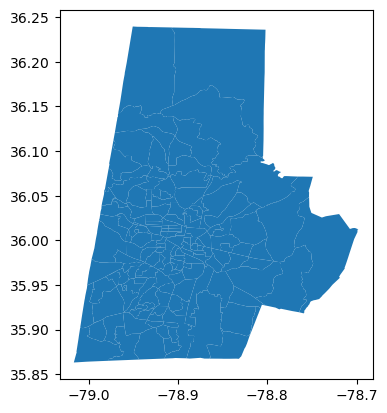

In [16]:
%matplotlib inline
gdf.plot()